In [5]:
import pandas as pd                                     #Import libraries
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("household_power_consumption.csv")         #Load the dataset

In [26]:
df.head() #Display the few rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [35]:
df = pd.read_csv("household_power_consumption.csv", sep=',')              #Load dataset

In [36]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],         #Combine Date and Time into one datetime column
                                format='%d/%m/%Y %H:%M:%S',
                                errors='coerce')

In [37]:
df.dropna(subset=['Datetime'], inplace=True)    # Drop bad datetime rows

In [38]:
df.set_index('Datetime', inplace=True)     # Set Datetime as index

In [39]:
df.drop(columns=['Date', 'Time'], inplace=True)   # Drop original Date and Time columns

In [40]:
for col in df.columns:                                             # Convert all remaining columns to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [41]:
df.dropna(how='all', inplace=True)       # Drop rows where all values are NaN

In [42]:
df_daily = df.resample('D').mean()      # Resample to daily means

In [43]:
print(df_daily.head())                  # Display result

            Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Datetime                                                                      
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361       

In [49]:
df_hourly = df.resample('h').mean()     # Resample to Hourly means
print("Hourly sample:")
print(df_hourly.head())

Hourly sample:
                     Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000

In [53]:
df_monthly = df.resample('ME').mean()     # Resample to Monthly means
print("monthly sample:")
print(df_monthly.head())

monthly sample:
            Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2006-12-31             1.901295               0.131386  241.441125   
2007-01-31             1.546034               0.132676  240.905101   
2007-02-28             1.401084               0.113637  240.519390   
2007-03-31             1.318627               0.114747  240.513469   
2007-04-30             0.891189               0.118778  239.400026   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Datetime                                                                      
2006-12-31          8.029956        1.248636        2.214987        7.409558  
2007-01-31          6.546915        1.264237        1.775931        7.383351  
2007-02-28          5.914569        1.180217        1.602361        6.703557  
2007-03-31          5.572979        1.361343        2.346872        6.504648  
2007-04-30         

In [54]:
df_features = df.copy()   # Index to access Datetime as a column

In [55]:
df_features = df_features.reset_index()

In [56]:
df_features['Hour'] = df_features['Datetime'].dt.hour     # Engineer time-based features

In [57]:
df_features['Day'] = df_features['Datetime'].dt.day

In [58]:
df_features['Month'] = df_features['Datetime'].dt.month

In [59]:
df_features['Year'] = df_features['Datetime'].dt.year

In [60]:
df_features['DayOfWeek'] = df_features['Datetime'].dt.dayofweek   # Monday=0, Sunday=6

In [61]:
df_features['IsWeekend'] = df_features['DayOfWeek'].isin([5, 6])  # Saturday & Sunday

In [62]:
df_features['WeekOfYear'] = df_features['Datetime'].dt.isocalendar().week

In [63]:
df_features['Quarter'] = df_features['Datetime'].dt.quarter

In [64]:
df_features[['Datetime', 'Hour', 'Day', 'Month', 'Year',                        #first 10 rows of engineered features
             'DayOfWeek', 'IsWeekend', 'WeekOfYear', 'Quarter']].head(10)

,Datetime,Hour,Day,Month,Year,DayOfWeek,IsWeekend,WeekOfYear,Quarter
0,2006-12-16 17:24:00,17,16,12,2006,5,True,50,4
1,2006-12-16 17:25:00,17,16,12,2006,5,True,50,4
2,2006-12-16 17:26:00,17,16,12,2006,5,True,50,4
3,2006-12-16 17:27:00,17,16,12,2006,5,True,50,4
4,2006-12-16 17:28:00,17,16,12,2006,5,True,50,4
5,2006-12-16 17:29:00,17,16,12,2006,5,True,50,4
6,2006-12-16 17:30:00,17,16,12,2006,5,True,50,4
7,2006-12-16 17:31:00,17,16,12,2006,5,True,50,4
8,2006-12-16 17:32:00,17,16,12,2006,5,True,50,4
9,2006-12-16 17:33:00,17,16,12,2006,5,True,50,4


In [67]:
df_features['Weekday/Weekend'] = df_features['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [72]:
def get_time_of_day(hour):               #Define function with correct name 
    if 5 <= hour < 12:
        return 'Morning'
    if 12 <= hour < 17:
        return 'Afternoon'
    if 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [76]:
df_features['TimeOfDay'] = df_features['Hour'].apply(get_time_of_day)        #Apply the function correctly using the same name
df_features[['Datetime', 'Hour', 'TimeOfDay']].head(10)                       #Show Output

,Datetime,Hour,TimeOfDay
0,2006-12-16 17:24:00,17,Evening
1,2006-12-16 17:25:00,17,Evening
2,2006-12-16 17:26:00,17,Evening
3,2006-12-16 17:27:00,17,Evening
4,2006-12-16 17:28:00,17,Evening
5,2006-12-16 17:29:00,17,Evening
6,2006-12-16 17:30:00,17,Evening
7,2006-12-16 17:31:00,17,Evening
8,2006-12-16 17:32:00,17,Evening
9,2006-12-16 17:33:00,17,Evening


In [77]:
y = df['Global_active_power']        #Split Data

In [78]:
split_index = int(len(y) * 0.8)                    #Train-test split
train, test = y[:split_index], y[split_index:]

In [81]:
!pip install statsmodels scikit-learn

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 756.4 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.6 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 993.8 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 993.8 kB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.6 MB 906.9 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 950.1 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.6 MB 950.1 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.6 MB 913.2 kB/s eta 0:00:09
   -------- ------------------------------- 2.1/9.6 MB 905.4 kB/s eta 0:00:09
   -------- ------------

In [82]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [84]:
np.random.seed(0)                 # Create dummy time series

In [88]:
date_rng = pd.date_range(start='2020-01-01', periods=100, freq='D')

In [86]:
data = pd.Series(np.random.randn(100), index=date_rng)

In [87]:
data.index = pd.DatetimeIndex(data.index).to_period('D')            # Fix the warning by setting a frequency

In [89]:
train = data[:80]     #Split Data
test = data[80:]

In [90]:
model = ARIMA(train, order=(5, 1, 0))        # Fit ARIMA
model_fit = model.fit()

In [91]:
forecast = model_fit.forecast(steps=len(test))        # Forecast

In [92]:
mse = mean_squared_error(test, forecast)           # Evaluate
print("ARIMA MSE:", mse)

ARIMA MSE: 1.3815269918321311


In [97]:
!pip install prophet

In [99]:
!pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.6 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.6 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.6 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.6 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 1.7 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.6 MB 1.7 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 1.6 MB/s eta 0:00:05
   -------------- ------------------------- 3.4/9.6 MB 1.6 MB/s eta 0:00:04
   --------------- --------------

In [100]:
import pandas as pd                                #Import Important Libraries
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [101]:
np.random.seed(0)                #Create dummy time series data

In [102]:
date_rng = pd.date_range(start='2020-01-01', periods=100, freq='D')

In [103]:
data = pd.DataFrame({
    'ds': date_rng,
    'y': np.random.randn(100).cumsum()
    })

In [104]:
train = data.iloc[:80]                 #Split data into train and test
test = data.iloc[80:]

In [107]:
model = Prophet()       #Initialize and fit Prophet model
model.fit(train)

23:33:04 - cmdstanpy - INFO - Chain [1] start processing
23:33:04 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
future = model.make_future_dataframe(periods=len(test))        #Make future dataframe and forecast

In [109]:
forecast = model.predict(future)

In [110]:
predicted = forecast[['ds', 'yhat']].iloc[-len(test):].reset_index(drop=True)     #Evaluate performance (compare forecasted 'yhat' with actual 'y')

In [ ]:
actual = test.reset_index(drop=True)

In [112]:
print("Prophet MSE:", mse)

Prophet MSE: 1.3815269918321311


In [120]:
import matplotlib.pyplot as plt                     #Actual vs Forecasted with Prophet

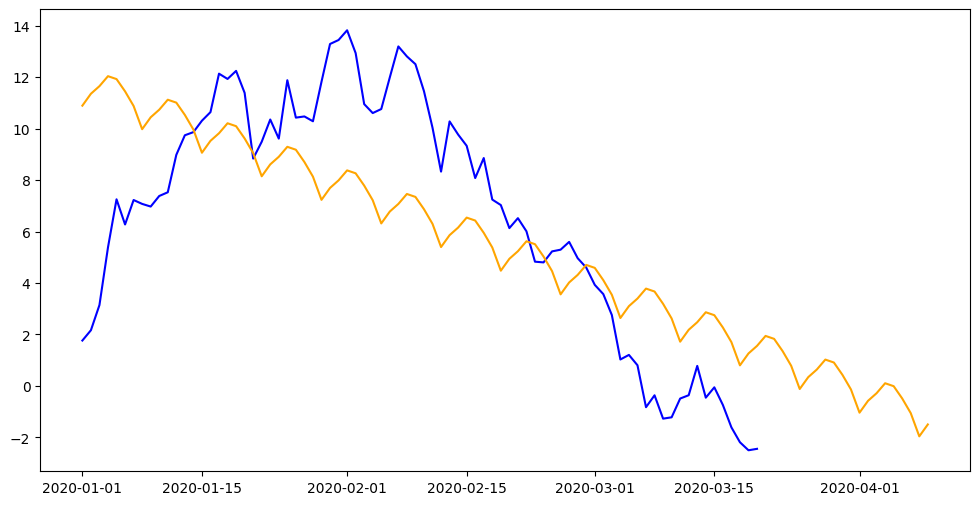

In [121]:
plt.figure(figsize=(12, 6))                                                     #Plot forecast values
plt.plot(train['ds'], train['y'], label='Actual (Train)', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast (Prophet)', color='orange')

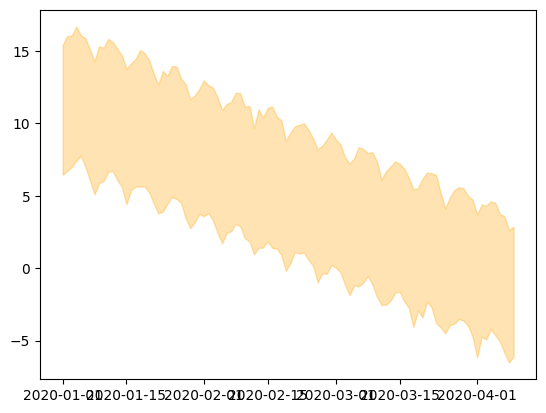

In [122]:
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],          #Plot confidence intervals
                 color='orange', alpha=0.3, label='Confidence Interval')

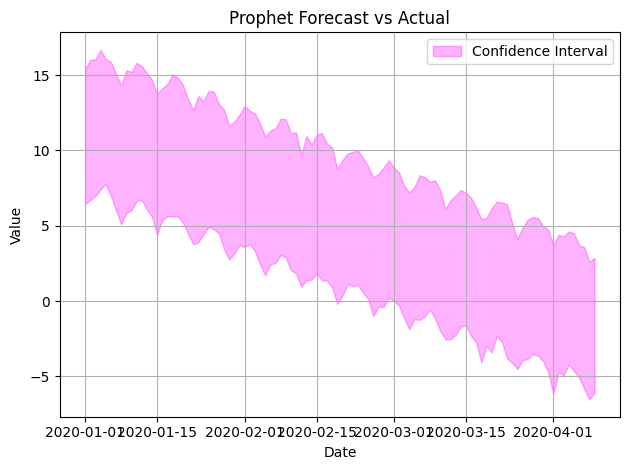

In [127]:
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 color='magenta', alpha=0.3, label='Confidence Interval')

plt.title("Prophet Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.6 MB/s eta 0:01:36
   ---------------------------------------- 1.3/150.0 MB 2.7 MB/s eta 0:00:56
   ---------------------------------------- 1.3/150.0 MB 2.7 MB/s eta 0:00:56
   ---------------------------------------- 1.3/150.0 MB 2.7 MB/s eta 0:00:56
   ---------------------------------------- 1.8/150.0 MB 1.7 MB/s eta 0:01:29
    --------------------------------------- 2.4/150.0 MB 1.7 MB/s eta 0:01:27
    --------------------------------------- 2.6/150.0 MB 1.6 MB/s eta 0:01:33
    --------------------------------------- 2.9/150.0 MB 1.7 MB/s eta 0:01:28
    --------------------------------------- 2.9/150.0 MB 1.7 MB/s eta 0:01:28
    --------------------------------------- 3.4/150.0 MB 1.5 MB/s eta 0:01:37
    ---

In [130]:
import pandas as pd                                   #Import Libraries XGBoost Forecast
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [131]:
df = df.copy()                          # Assume 'df' has 'Datetime' and 'Global_active_power
df = df.reset_index()  # Ensure Datetime is a column

In [132]:
df['Hour'] = df['Datetime'].dt.hour          #Time Features
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

In [133]:
features = ['Hour', 'Day', 'Month', 'DayOfWeek']          # Features and target 
target = 'Global_active_power'

In [134]:
split = int(len(df) * 0.8)               #train test split
train, test = df[:split], df[split:]

In [135]:
model = XGBRegressor()                 #train model
model.fit(train[features], train[target])

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [136]:
pred = model.predict(test[features])                   #predict
print("MSE:", mean_squared_error(test[target], pred))

MSE: 0.8416977309079816


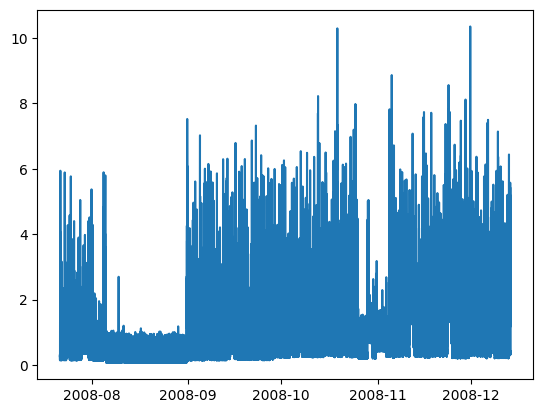

In [138]:
plt.plot(test['Datetime'], test[target], label='Actual')

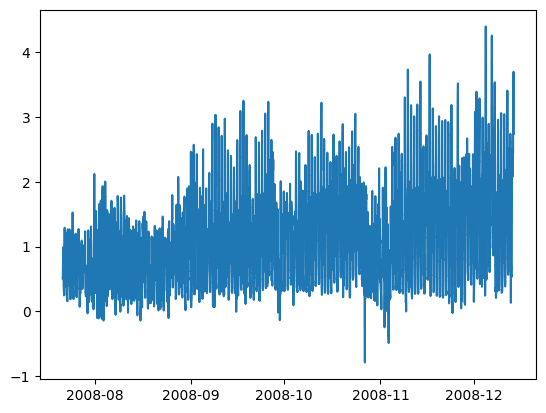

In [139]:
plt.plot(test['Datetime'], pred, label='Predicted')

In [142]:
print(test[['Datetime']].head())             
print(test[target].head())
print(pred[:5])

                  Datetime
835604 2008-07-21 17:53:00
835605 2008-07-21 17:54:00
835606 2008-07-21 17:55:00
835607 2008-07-21 17:56:00
835608 2008-07-21 17:57:00
835604    0.256
835605    0.254
835606    0.252
835607    0.248
835608    0.248
Name: Global_active_power, dtype: float64
[0.5074402 0.5074402 0.5074402 0.5074402 0.5074402]


In [143]:
print(len(test), len(pred))

208902 208902


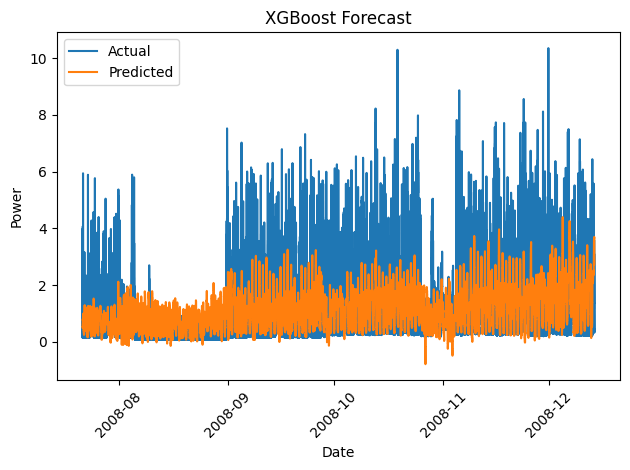

In [144]:
plt.plot(test['Datetime'], test[target], label='Actual')   #Plot values
plt.plot(test['Datetime'], pred, label='Predicted')
plt.legend()
plt.title("XGBoost Forecast")
plt.xlabel("Date")
plt.ylabel("Power")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [145]:
import matplotlib.pyplot as plt               #Plotting Actual vs Forecasted Energy

In [147]:
test.loc[:, 'Datetime'] = pd.to_datetime(test['Datetime'])      #'Datetime' is in datetime format   

In [149]:
if len(test) != len(pred):                        #test of matching length
    test = test.iloc[:len(pred)]

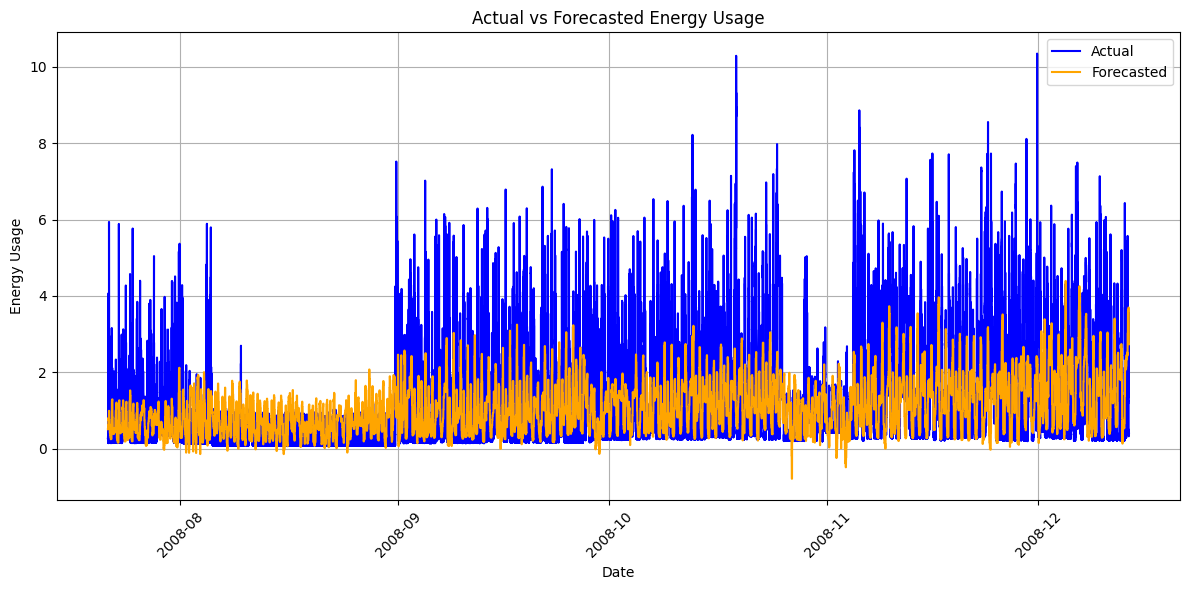

In [152]:
plt.figure(figsize=(12, 6))                                              #Plotting Values
plt.plot(test['Datetime'], test[target], label='Actual', color='blue')
plt.plot(test['Datetime'], pred, label='Forecasted', color='orange')
plt.title('Actual vs Forecasted Energy Usage')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()